<a href="https://colab.research.google.com/github/Aswin19990909/aswin1/blob/main/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define the paths to your image and csv folders
train_val_dir = "/content/drive/MyDrive/Colab Notebooks/charts/charts/train_val"
test_dir = "/content/drive/MyDrive/Colab Notebooks/charts/charts/test"
train_path_labels = "/content/drive/MyDrive/Colab Notebooks/charts/charts/train_val.csv"
train_val_labels = pd.read_csv(train_path_labels)

In [ ]:
# load training dataset in numpy array
images = []
labels = []
for filename in os.listdir(train_val_dir):
 if filename.endswith('.png'):
 # Load the images and resize them to (128, 128) with 3 color channels
  img = cv2.imread(os.path.join(train_val_dir, filename))
  img = cv2.resize(img, (128, 128))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# img = Image.open(os.path.join(train_val_dir, filename))
  img_array = np.array(img)
 # Append the array to the list of images
  images.append(img_array)
  labels.append(filename)

# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [ ]:
x_train.shape

(1000, 128, 128, 3)

In [ ]:
x_train[:5]
y_train[:5]

array([10,  8,  9,  7,  2])

In [ ]:
# load test dataset in numpy array
images = []
labels = []
for filename in os.listdir(test_dir):
 if filename.endswith('.png'):
 # Load the images and resize them to (128, 128) with 3 color channels
  img = cv2.imread(os.path.join(test_dir, filename))
  img = cv2.resize(img, (128, 128))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# img = Image.open(os.path.join(test_dir, filename))
  img_array = np.array(img)
 # Append the array to the list of images
  images.append(img_array)
  labels.append(filename)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert the lists to NumPy arrays

In [ ]:
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [ ]:
x_test.shape

(50, 128, 128, 3)

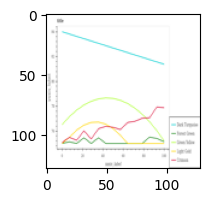

In [ ]:
# check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [ ]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])

In [ ]:
y_train
y_train.shape
y_test.shape

(50,)

In [ ]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample
def image_sample(x, y, index):
 plt.figure(figsize = (10,2))
 plt.imshow(x[index])
# image_label = train_val_labels.iloc[index]['type']
# plt.xlabel(image_label)
 plt.xlabel(image_classes[y[index]])

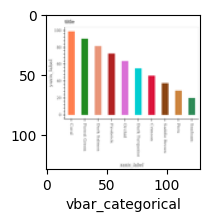

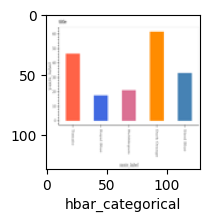

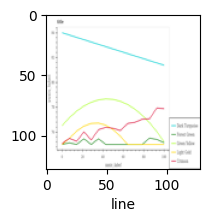

In [ ]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,444)

In [ ]:
# now we have mapped the corresponding labels to the image

In [ ]:
# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255

In [ ]:

x_test.shape

(1000, 128, 128, 3)

In [ ]:
# take the label for train data from csv file
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [ ]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [ ]:
# writing a simple nn to test first
# Define the model architecture
model = Sequential([
 Flatten(input_shape=(128,128,3)),
 Dense(3000, activation='relu'),
 Dense(1000, activation='relu'),
 Dense(5, activation='softmax')
])
# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 49s 1s/step - loss: 6.4729 - accuracy: 0.1920
Epoch 2/10
32/32 [==============================] - 37s 1s/step - loss: 1.6141 - accuracy: 0.2170
Epoch 3/10
32/32 [==============================] - 38s 1s/step - loss: 1.6229 - accuracy: 0.2610
Epoch 4/10
32/32 [==============================] - 38s 1s/step - loss: 1.5866 - accuracy: 0.2560
Epoch 5/10
32/32 [==============================] - 37s 1s/step - loss: 1.5648 - accuracy: 0.3060
Epoch 6/10
32/32 [==============================] - 38s 1s/step - loss: 1.5040 - accuracy: 0.3260
Epoch 7/10
32/32 [==============================] - 36s 1s/step - loss: 1.6296 - accuracy: 0.2960
Epoch 8/10
32/32 [==============================] - 38s 1s/step - loss: 1.5269 - accuracy: 0.3230
Epoch 9/10
32/32 [==============================] - 36s 1s/step - loss: 1.4730 - accuracy: 0.3500
Epoch 10/10
32/32 [==============================] - 38s 1s/step - loss: 1.5126 - accuracy: 0.3500


In [ ]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
model.evaluate(x_test,y_test)


7/7 [==============================] - 2s 325ms/step - loss: 1.6367 - accuracy: 0.2000


[1.636663794517517, 0.20000000298023224]

In [ ]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,y_pred_classes))

7/7 [==============================] - 2s 321ms/step


In [ ]:
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy

In [ ]:
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 21s 21s/step - loss: 1.6108 - accuracy: 0.2125 - val_loss: 1.7902 - val_accuracy: 0.2400
Epoch 2/50
1/1 [==============================] - 16s 16s/step - loss: 1.9379 - accuracy: 0.1900 - val_loss: 1.6243 - val_accuracy: 0.1900
Epoch 3/50
1/1 [==============================] - 15s 15s/step - loss: 1.5991 - accuracy: 0.2087 - val_loss: 1.6635 - val_accuracy: 0.3000
Epoch 4/50
1/1 [==============================] - 15s 15s/step - loss: 1.6156 - accuracy: 0.3237 - val_loss: 1.6260 - val_accuracy: 0.1850
Epoch 5/50
1/1 [==============================] - 16s 16s/step - loss: 1.5857 - accuracy: 0.2325 - val_loss: 1.5818 - val_accuracy: 0.3150
Epoch 6/50
1/1 [==============================] - 15s 15s/step - loss: 1.5516 - accuracy: 0.3925 - val_loss: 1.5419 - val_accuracy: 0.2900
Epoch 7/50
1/1 [==============================] - 15s 15s/step - loss: 1.5222 - accuracy: 0.3187 - val_loss: 1.4951 - val_accuracy: 0.4100
Epoch 8/50
1/1 [===========

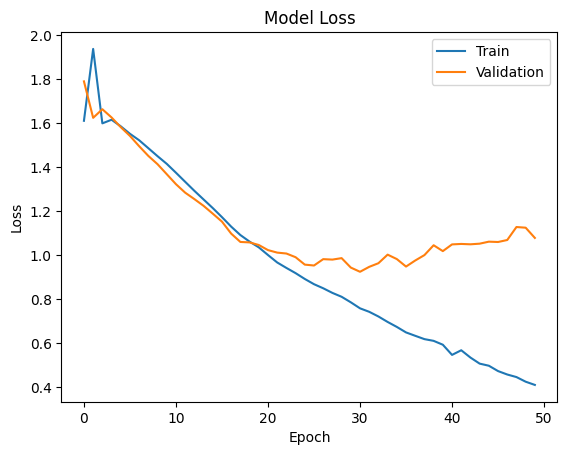

In [ ]:
# modify the model architecture to cmnn
cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 125ms/step - loss: 1.0777 - accuracy: 0.6250


[1.0777382850646973, 0.625]

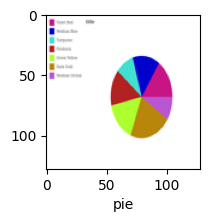

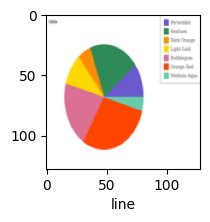

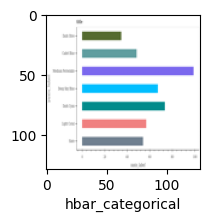

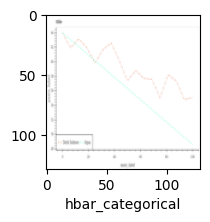

In [ ]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [ ]:
# Observation: we can see some wrong predictions

In [ ]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

7/7 [==============================] - 1s 124ms/step


array([[5.6706357e-01, 2.4075912e-02, 3.7951630e-01, 2.4323642e-02,
        5.0205090e-03],
       [4.5541784e-01, 1.6816017e-04, 1.8378464e-03, 6.0318616e-05,
        5.4251593e-01],
       [2.9440939e-01, 4.6725059e-04, 8.2495046e-04, 2.9771877e-04,
        7.0400071e-01],
       [6.3055377e-03, 3.5502794e-06, 1.1657472e-05, 5.0772127e-05,
        9.9362844e-01],
       [5.8143723e-01, 1.2816723e-01, 2.5103644e-01, 8.5097626e-03,
        3.0849271e-02]], dtype=float32)

In [ ]:

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 4, 4, 4, 0]

In [ ]:
y_test[:5]


array([0, 4, 4, 4, 0])

In [ ]:
# here we see some values are not matching

'dot_line'

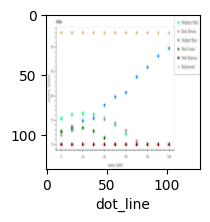

In [ ]:
# test actual and predicted
# image_sample(x_test,y_test,1) #actual
# image_classes[y_classes[1]] #predicted
# image_sample(x_test,y_test,10) #actual
# image_classes[y_classes[10]] #predicted
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [ ]:

# some values are not matching

In [ ]:

print("classification report: \n", classification_report(y_test,y_classes))


classification report: 
               precision    recall  f1-score   support

           0       0.52      0.59      0.56        37
           1       0.90      0.80      0.84        44
           2       0.72      0.38      0.49        48
           3       0.42      0.61      0.49        33
           4       0.65      0.79      0.71        38

    accuracy                           0.62       200
   macro avg       0.64      0.63      0.62       200
weighted avg       0.66      0.62      0.62       200



In [ ]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[22  2  1  3  9]
 [ 2 35  1  4  2]
 [10  0 18 20  0]
 [ 1  2  5 20  5]
 [ 7  0  0  1 30]]


Text(95.72222222222221, 0.5, 'Actual')

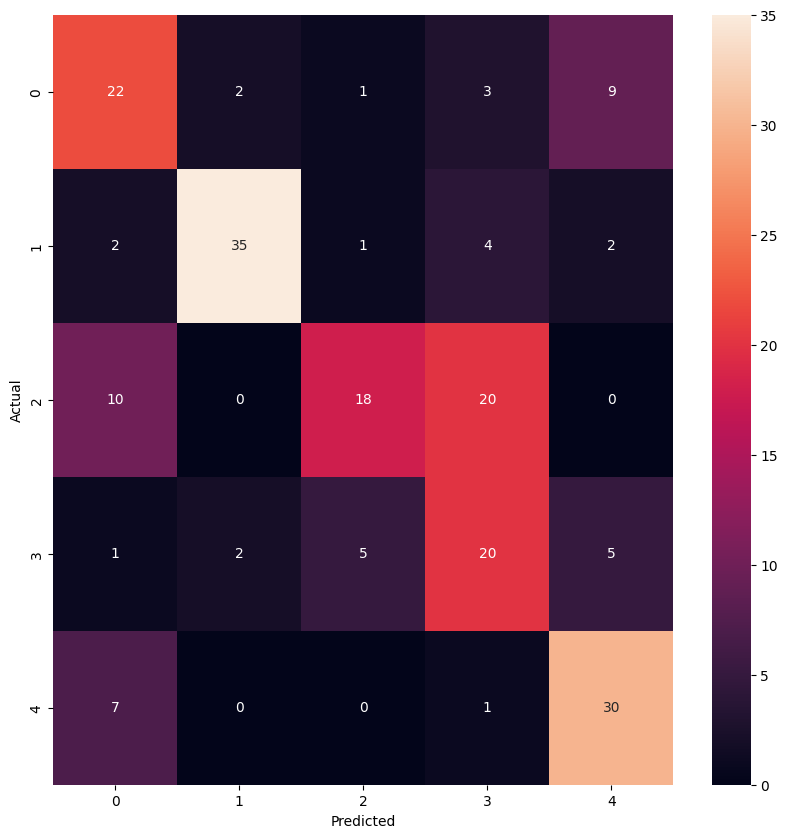

In [ ]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [ ]:
# for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# Replace the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)

In [ ]:
# Freeze the weights of all layers except the new classification layer
for layer in pt_model.layers:
 layer.trainable = False


In [ ]:
# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Print the summary of the model architecture
pt_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     